<a href="https://colab.research.google.com/github/joshimohitm9/Feature-Engineering/blob/main/Missing_value_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.shape

(1460, 81)

In [ ]:
null=df.isnull().sum().sort_values(ascending=False).head(20)
null

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

<Axes: >

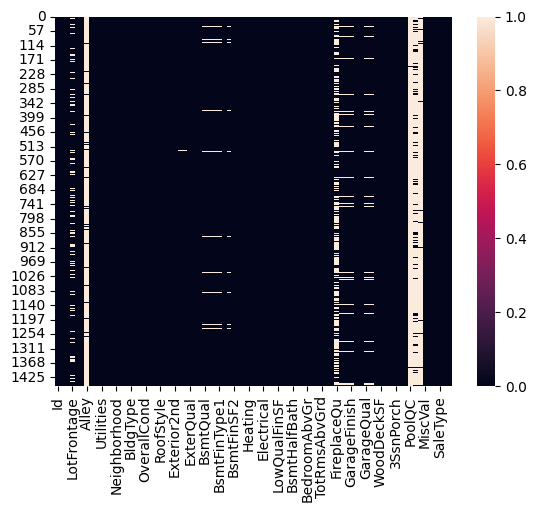

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
null_per=null/df.shape[0]*100
null_per

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [ ]:
null_val=null_per[null_per>20].keys()

In [ ]:
df.drop(null_val,axis=1,inplace=True)

In [ ]:
df.shape

(1460, 76)

<Axes: >

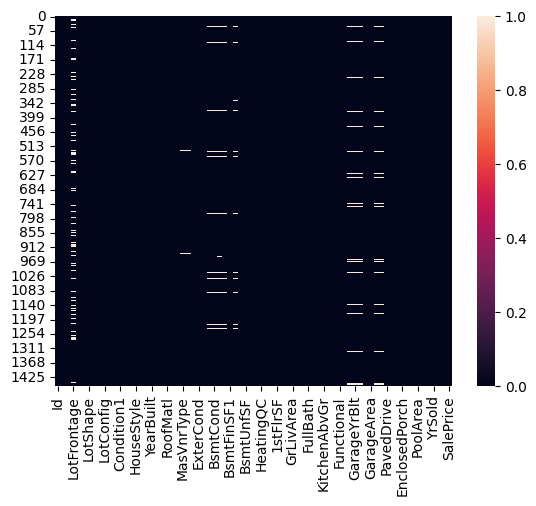

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df_num=df.select_dtypes(include=["int64","float64"])

In [ ]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df_num.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
dtype: int64

<Axes: >

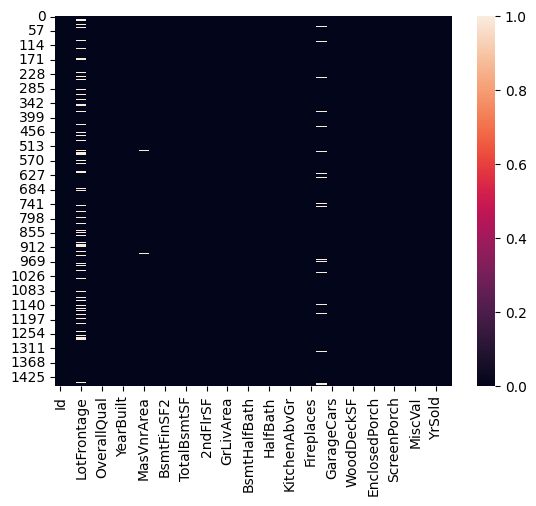

In [ ]:
sns.heatmap(df_num.isnull())

In [ ]:
df_num=df_num.fillna(df_num.mean())

In [ ]:
df["LotFrontage"].mean()

70.04995836802665

In [ ]:
df["GarageYrBlt"].mean()

1978.5061638868744

In [ ]:
df.MasVnrArea.mean()

103.68526170798899

In [ ]:
df_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

<Axes: >

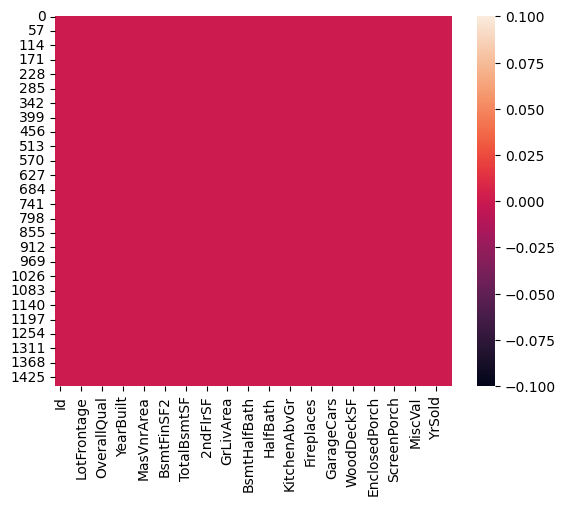

In [ ]:
sns.heatmap(df_num.isnull())

In [ ]:
df.update(df_num)

In [ ]:
cat_null=df.isnull().sum().sort_values(ascending=False).head(20)
cat_null

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
Electrical       1
FullBath         0
BsmtHalfBath     0
TotRmsAbvGrd     0
BsmtFullBath     0
HalfBath         0
GrLivArea        0
LowQualFinSF     0
BedroomAbvGr     0
KitchenAbvGr     0
dtype: int64

In [ ]:
cat_null=cat_null[cat_null>0].keys()


In [ ]:
for var in cat_null:
   df[var].fillna(df[var].mode()[0],inplace=True)


In [ ]:
df.isnull().sum().sum()

0